# DACON Wine
Kaggle wine에서는 마땅한 데이터 셋을 찾지 못해서.. DACON의 Wine 데이터 셋을 이용  
[데이터 셋 출처](https://dacon.io/competitions/open/235610/data)

### Classification - LightGBM
### 사용 라이브러리

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier
from lightgbm import plot_importance

### Data Load

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.shape, test.shape

((5497, 14), (1000, 13))

### 범주형 데이터 수치형 데이터로 변경하기
`type`의 경우 범주형 데이터이므로 수치형 데이터로 전환함  
`white=1`, `red=0`


In [3]:
# train
temp = pd.get_dummies(train["type"], drop_first=True)
train = pd.concat([train, temp], axis=1).copy()
train.drop(columns="type", inplace=True)

In [4]:
# test
temp = pd.get_dummies(test["type"], drop_first=True)
test = pd.concat([test, temp], axis=1).copy()
test.drop(columns="type", inplace=True)

### Train - LightGBM

In [19]:
label_name = "quality"

features_names = train.columns.tolist()
features_names.remove("index")
features_names.remove(label_name)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train[features_names], train[label_name], test_size=0.2)

print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (4397, 12)
y_train: (4397,)
X_test: (1100, 12)
y_test: (1100,)


In [46]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]

lgbm_wrapper.fit(X_train, y_train, eval_metric="logloss", eval_set=evals, verbose=False)

c:\Users\spec3\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(n_estimators=400)

In [47]:
preds = lgbm_wrapper.predict(X_test)

accuracy_score(y_test, preds)

0.6318181818181818

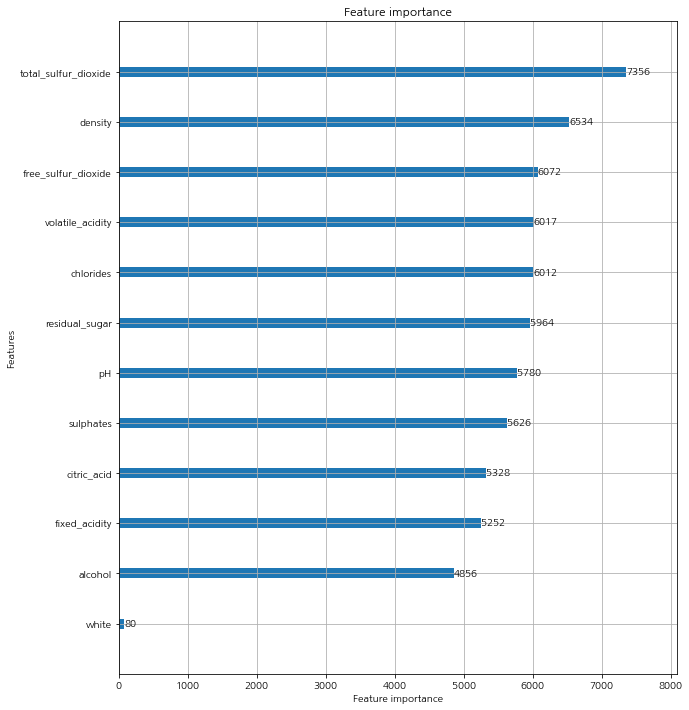

In [48]:
fig, ax = plt.subplots(figsize=(10, 12))
_ = plot_importance(lgbm_wrapper, ax=ax)